1. setting up the environments and libraries




In [16]:
%pip install pandas  # Installs the pandas library for data manipulation and analysis
%pip install numpy   # Installs the NumPy library for numerical computing
%pip install torch    # Installs the PyTorch library for deep learning
%pip install torchvision  # Installs the torchvision library for computer vision tasks
%pip install matplotlib  # Installs the matplotlib library for data visualization

2. Importing dataset from torchvision


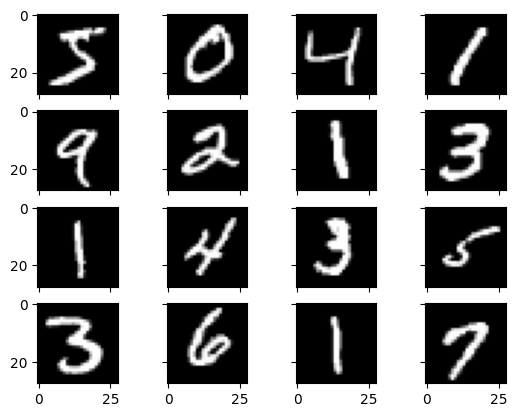

In [17]:
from torchvision import datasets  # Imports the datasets module from torchvision for accessing various datasets
from torchvision.transforms import ToTensor  # Imports ToTensor for converting images to PyTorch tensors
import matplotlib.pyplot as plt  # Imports matplotlib.pyplot for data visualization

import torchvision  # Provides tools for computer vision tasks
from torchvision import transforms  # Provides image transformation functions

# Load the MNIST dataset
# The MNIST dataset contains handwritten digits (0-9) for image recognition tasks.
# We're loading the training portion of the dataset and downloading it if it's not already present.
train = torchvision.datasets.MNIST('./data', train=True, download=True)

# Create a figure and subplots to display images
# This creates a 4x4 grid of subplots to display 16 images.
# 'sharex=True' and 'sharey=True' mean that the subplots share the same x and y axes.
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

# Loop through the subplots to display images
# This nested loop iterates through the rows (i) and columns (j) of the subplot grid.
for i in range(4):
    for j in range(4):
        # Display an image in the current subplot
        # train.data[4*i+j] selects the image data to display.
        # cmap="gray" specifies to display the image in grayscale.
        ax[i][j].imshow(train.data[4*i+j], cmap="gray")

# Show the plot with all the images
plt.show()

3. downloading datasets from MNST and Train data


In [18]:
train_data = datasets.MNIST(
    root='data',  # Specifies the directory where the dataset will be stored
    train=True,  # Indicates that we are loading the training dataset
    download=True,  # Downloads the dataset if it is not already present
    transform=ToTensor()  # Converts the images to PyTorch tensors
)

test_data = datasets.MNIST(
    root='data',  # Specifies the directory where the dataset will be stored
    train=False,  # Indicates that we are loading the test dataset
    download=True,  # Downloads the dataset if it is not already present
    transform=ToTensor()  # Converts the images to PyTorch tensors
) # Loads the MNIST test dataset and applies the ToTensor transform.

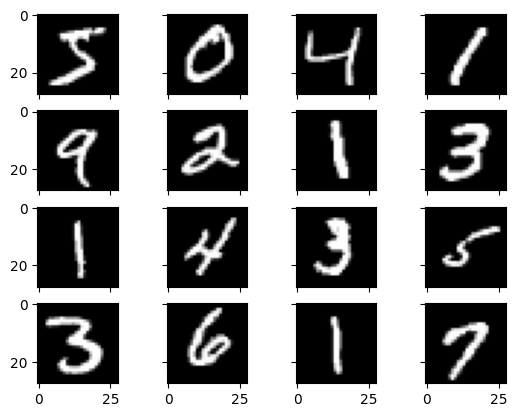

In [19]:
# Import the torchvision library, which contains tools for computer vision.
import torchvision

# Load the MNIST dataset, which contains images of handwritten digits (0-9).
# We're using the training part of the dataset and downloading it if needed.
train = torchvision.datasets.MNIST('./data', train=True, download=True)

# Create a grid of 4x4 subplots to display images.
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

# Loop through the rows and columns of the grid.
for i in range(4):
    for j in range(4):
        # Display an image from the dataset in the current subplot.
        # We're using a grayscale colormap ('gray').
        ax[i][j].imshow(train.data[4*i+j], cmap="gray")

# Show the plot with all the images.
plt.show()

3. training **data**

In [20]:
train_data  # This variable holds the MNIST training dataset.

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [21]:
import torchvision # Image tools

# Load training data (handwritten digits & labels)
train = torchvision.datasets.MNIST('data', train=True, download=True)

# Load testing data (should be train=False for actual testing)
test = torchvision.datasets.MNIST('data', train=True, download=True)

# Print size of training data (images & labels) Returns the dimensions of the image data tensor in the training dataset.
print(train.data.shape, train.targets.shape)

# Print size of testing data (images & labels) Returns the shape of the image data tensor in the training dataset
print(test.data.shape, test.targets.shape)

torch.Size([60000, 28, 28]) torch.Size([60000])
torch.Size([60000, 28, 28]) torch.Size([60000])


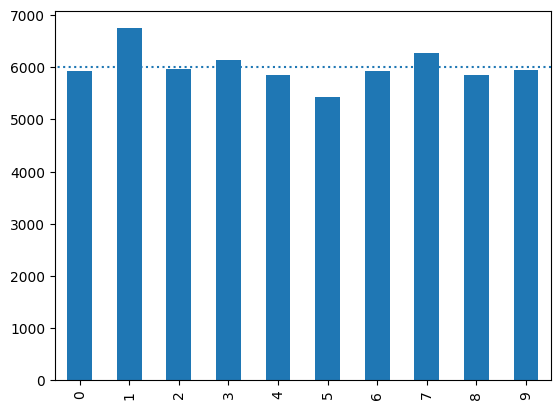

In [22]:
#MNIST Label Distribution

import pandas as pd  # Imports the pandas library for data manipulation.
import matplotlib.pyplot as plt  # Imports the matplotlib library for plotting.
from torchvision import datasets  # Imports the datasets module from torchvision.

# Get the labels (targets) from the training data.
labels = train_data.targets
# Count the occurrences of each label and sort by label value.
label_counts = pd.Series(labels.numpy()).value_counts().sort_index()
# Create a bar plot of the label counts.
label_counts.plot.bar()
# Add a horizontal dotted line at y=6000.
plt.hlines(xmin=-1, xmax=10, y=6000, linestyles='dotted')
# Display the plot.
plt.show()

4. loading data into batches

In [23]:
from torch.utils.data import DataLoader  # Import the DataLoader class for creating data loaders

# Create a dictionary to store the train and test data loaders
loader = {
    'train': DataLoader(train_data,  # Use the training data (train_data)
                         batch_size=100,  # Set the batch size to 100
                         shuffle=True,  # Shuffle the data for each epoch
                         num_workers=1),  # Use 1 worker process for data loading

    'test': DataLoader(test_data,  # Use the test data (test_data)
                        batch_size=100,  # Set the batch size to 100
                        shuffle=True,  # Shuffle the data
                        num_workers=1),  # Use 1 worker process for data loading
}

In [24]:
loader


loader = {
    'train': DataLoader(train_data, batch_size=100, shuffle=True, num_workers=1),
    'test': DataLoader(test_data, batch_size=100, shuffle=True, num_workers=1),
}

**Explore the Dataset**

Visualize a Batch of Training Data
The first step in a classification task is to take a look at the data, make sure it is loaded in correctly, then make any initial observations about patterns in that data.

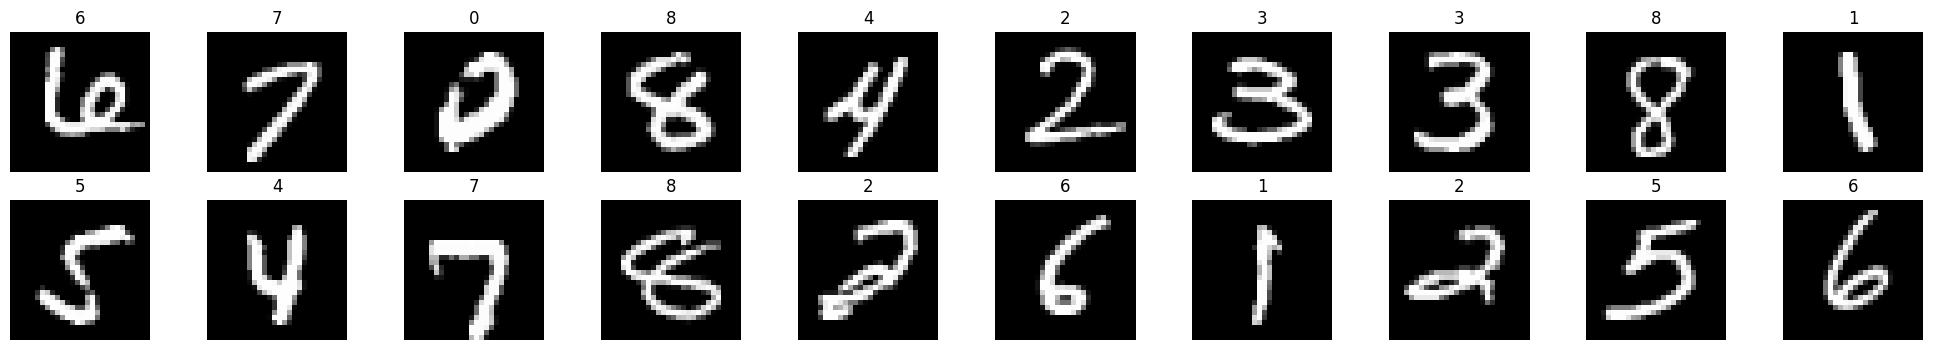

In [25]:
# Import necessary libraries
import matplotlib.pyplot as plt  # For creating plots
%matplotlib inline
# To display plots within the notebook
import numpy as np  # For numerical operations, especially with arrays

# Get a batch of training images and labels
dataiter = iter(loader['train'])  # Create an iterator for the training data loader
images, labels = next(dataiter)  # Get the next batch of images and labels
images = images.numpy()  # Convert images to NumPy arrays for plotting

# Create a figure and subplots to display the images
fig, subs = plt.subplots(2, 10, figsize=(25, 4))  # Create 2 rows, 10 columns of subplots

# Iterate through the images and labels in the batch
for idx, sub in zip(np.arange(20), subs.flatten()):  # Loop through 20 images and subplots
    sub.imshow(np.squeeze(images[idx]), cmap='gray')  # Display the image in grayscale
    sub.set_title(str(labels[idx].item()))  # Set the title to the image's label
    sub.axis("off")  # Turn off axes for cleaner visualization

**View an Image in More Detail**

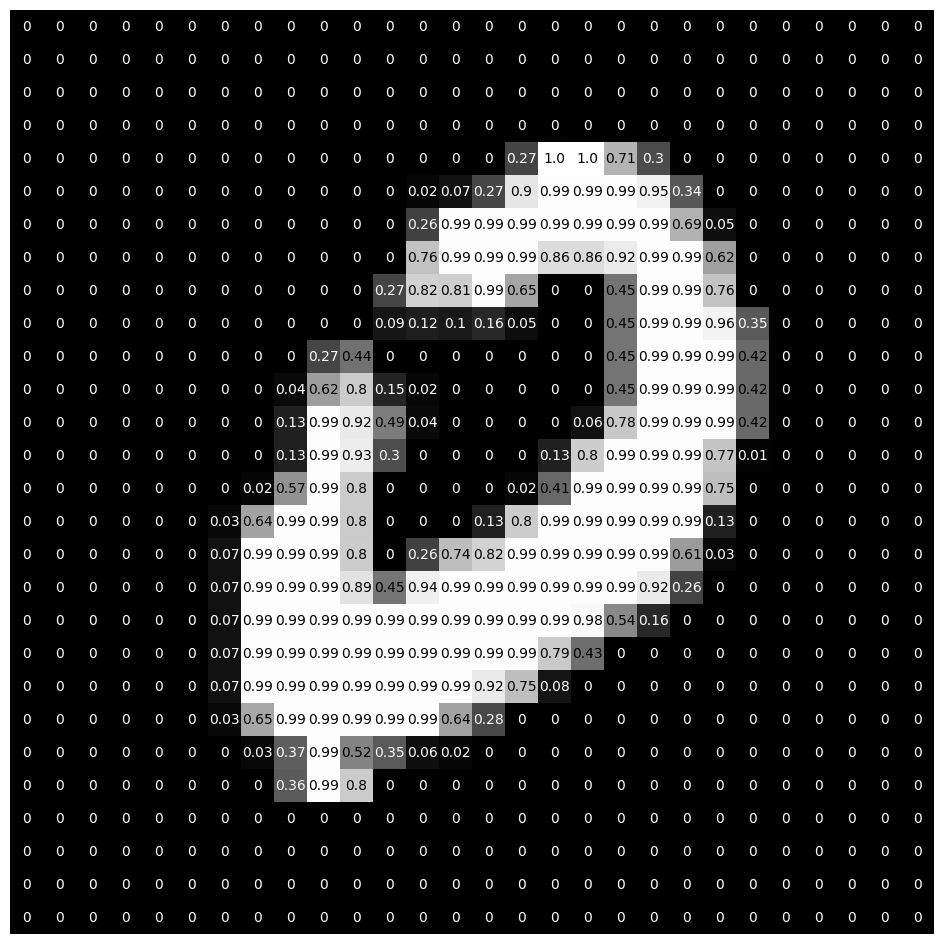

In [26]:
# Select an image from the batch (image at index 2)
img = np.squeeze(images[2])

# Create a figure and axes for the plot
fig, sub = plt.subplots(figsize=(12, 12))

# Display the image in grayscale
sub.imshow(img, cmap='gray')

# Get the width and height of the image
width, height = img.shape

# Set a threshold for text color (based on image intensity)
thresh = img.max() / 2.5

# Iterate through each pixel of the image
for x in range(width):
    for y in range(height):
        # Get the pixel value and round it to 2 decimal places
        val = round(img[x][y], 2) if img[x][y] != 0 else 0

        # Annotate the pixel value on the image
        sub.annotate(str(val), xy=(y, x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    # Set text color based on pixel intensity and threshold
                    color='white' if img[x][y] < thresh else 'black')

        # Turn off axes for cleaner visualization
        sub.axis("off")

In [27]:
import torch.nn as nn #importing neural network
import torch.nn.functional as F # importing functions and other utilities
import torch.optim as optim # importing optimzer , optimizing algorithms

class CNN(nn.Module): # Corrected inheritance to nn.Module, convolutional Neural Network (CNN Class)
    def __init__(self):
        super(CNN, self).__init__()  # Initialize the parent class (nn.Module)


      # Define the convolutional layers
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5 )  #convulational layer 1,, 1 input channel, 10 output channels, 5x5 kernel
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5) #convulational layer 2 ,  10 input channels, 20 output channels, 5x5 kernel
        self.conv2_drop = nn.Dropout2d()  # Dropout layer to prevent overfitting
        self.fc1 = nn.Linear(320, 50) #fullyconnected layer 1 ,320 in and 50 output neuron
        self.fc2 = nn.Linear(50, 10)  # 50 input features, 10 output features (for 10 digit classes)

    def forward(self, x):  # x=data
         # Apply convolutional layers, activation function, and max pooling
        x = F.relu(F.max_pool2d(self.conv1(x), 2))  # rectifier linear unit activation function
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))  # calling dropout function layer
        x = x.view(-1, 320)  # 20*4*4 = 320, assigned the result to x
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)  #applying softmax and taking log for numerical stability
        # or return x if you dont want to apply softma


In [28]:
import torch

# Determine if a GPU is available, otherwise use the CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create an instance of the CNN model and move it to the selected device
model = CNN().to(device)

# Create an Adam optimizer for the model's parameters with a learning rate of 0.001
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the loss function (Cross-Entropy Loss)
loss_fn = nn.CrossEntropyLoss()

# Function to train the model for one epoch
def train(model, device, train_loader, optimizer, epoch):
    model.train()  # Set the model to training mode
    for batch_idx, (data, target) in enumerate(loader['train']):
        data, target = data.to(device), target.to(device)  # Move data and target to the selected device
        optimizer.zero_grad()  # Reset the gradients
        output = model(data)  # Forward pass: get predictions
        loss = loss_fn(output, target)  # Calculate the loss
        loss.backward()  # Backpropagate the loss
        optimizer.step()  # Update the model's parameters

        # Print training progress every 10 batches
        if batch_idx % 10 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loader["train"].dataset)} ({100. *batch_idx / len(loader["train"]):.0f}%)]\t{loss.item():.6f}')

# Function to evaluate the model on the test set
def test():
  model.eval()  # Set the model to evaluation mode

  test_loss = 0
  correct = 0
  with torch.no_grad():  # Disable gradient calculation during evaluation
    for data, target in loader['test']:
      data, target = data.to(device), target.to(device)  # Move data and target to the selected device
      output = model(data)  # Forward pass: get predictions
      test_loss += loss_fn(output, target).item()  # Accumulate the loss
      pred = output.argmax(dim=1, keepdim=True)  # Get the predicted class
      correct += pred.eq(target.view_as(pred)).sum().item()  # Count correct predictions

  test_loss /= len(loader['test'].dataset)  # Calculate average loss
  # Print the test results (average loss and accuracy)
  print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loader["test"].dataset)} ({100. * correct / len(loader["test"].dataset):.0f}%)\n')

In [29]:
for epoch in range(1, 10):
    train(model, device, loader['train'], optimizer, epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	2.304994
Train Epoch: 1 [1000/60000 (2%)]	2.310233
Train Epoch: 1 [2000/60000 (3%)]	2.253101
Train Epoch: 1 [3000/60000 (5%)]	2.186106
Train Epoch: 1 [4000/60000 (7%)]	2.055326
Train Epoch: 1 [5000/60000 (8%)]	1.735055
Train Epoch: 1 [6000/60000 (10%)]	1.315753
Train Epoch: 1 [7000/60000 (12%)]	1.229287
Train Epoch: 1 [8000/60000 (13%)]	0.985966
Train Epoch: 1 [9000/60000 (15%)]	1.017939
Train Epoch: 1 [10000/60000 (17%)]	0.807227
Train Epoch: 1 [11000/60000 (18%)]	0.792267
Train Epoch: 1 [12000/60000 (20%)]	0.705921
Train Epoch: 1 [13000/60000 (22%)]	1.004766
Train Epoch: 1 [14000/60000 (23%)]	0.693579
Train Epoch: 1 [15000/60000 (25%)]	0.590684
Train Epoch: 1 [16000/60000 (27%)]	0.673966
Train Epoch: 1 [17000/60000 (28%)]	0.678126
Train Epoch: 1 [18000/60000 (30%)]	0.508697
Train Epoch: 1 [19000/60000 (32%)]	0.629765
Train Epoch: 1 [20000/60000 (33%)]	0.770042
Train Epoch: 1 [21000/60000 (35%)]	0.587682
Train Epoch: 1 [22000/60000 (37%)]	0.544105
Train E

Validation Loss: 0.0005, Validation Accuracy: 0.9842


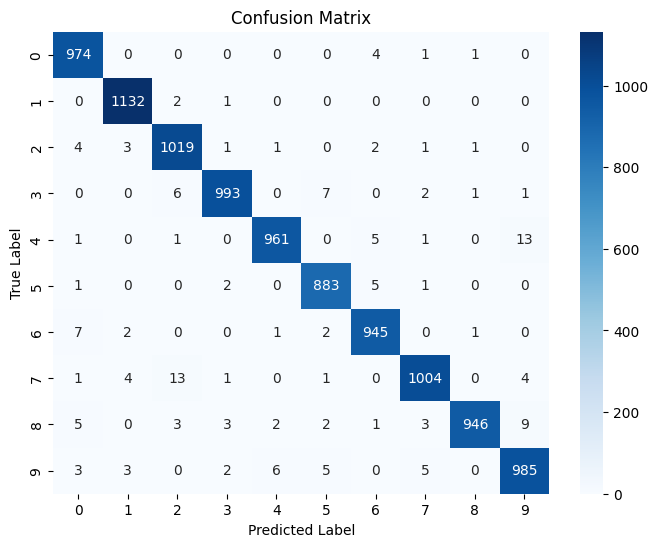

In [30]:
# Install necessary libraries
!pip install seaborn matplotlib

# Import necessary libraries
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming 'model', 'loss_fn', and 'loader' are defined, and 'device' is set up
model.eval()  # Set the model to evaluation mode

# Initialize variables to store validation loss and accuracy
val_loss = 0
val_accuracy = 0

# Initialize lists to store true labels and predicted labels for confusion matrix
true_labels = []
predicted_labels = []

# Disable gradient calculation during evaluation
with torch.no_grad():
    for data, target in loader['test']:  # Assuming 'test' is your validation set
        data, target = data.to(device), target.to(device)  # Move data to device

        # Get predictions
        val_predictions = model(data)

        # Calculate and accumulate validation loss
        val_loss += loss_fn(val_predictions, target).item()

        # Get predicted class and calculate accuracy
        _, val_predicted = torch.max(val_predictions.data, 1)
        val_accuracy += (val_predicted == target).sum().item()

        # Store labels for confusion matrix
        true_labels.extend(target.cpu().numpy())
        predicted_labels.extend(val_predicted.cpu().numpy())

# Calculate average validation loss and accuracy
val_loss /= len(loader['test'].dataset)
val_accuracy /= len(loader['test'].dataset)

# Print validation metrics
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

prediction: 9


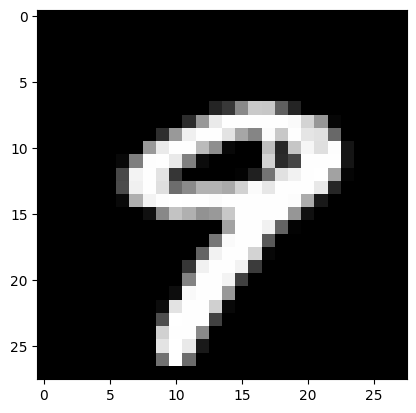

In [31]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[9]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f'prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()

In [32]:
device

device(type='cpu')